<center>

<h1 style="font-size: 36px; color: black;">Python</h1>
<h1 style="font-size: 36px; color: black;">END SEM PROJECT</h1>
<h1 style="font-size: 20px; color: red;">Heart Disease Prediction And  Feature Analysis using Machine Learning</h1>

</center>


##  Importing the essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.android', '.bash_history', '.conda', '.condarc', '.continuum', '.gradle', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.m2', '.matplotlib', '.packettracer', '.VirtualBox', '.vscode', '1138_bus.mtx', 'anaconda3', 'AndroidStudioProjects', 'ansel', 'AppData', 'Application Data', 'Assignment_1.ipynb', 'assignment_2.ipynb', 'Assignment_3.ipynb', 'asus', 'Automobile_data.csv', 'battery-report.html', 'biocodea3.ipynb', 'CB.EN.U4AIE22159 DSA 1.ipynb', 'Cisco Packet Tracer 8.2.1', 'Class_Assignment_4.ipynb', 'Cleaned_Automobile_data.csv', 'Contacts', 'Cookies', 'DecisionTree.py', 'diabetes.ipynb', 'diabetes.pkl', 'Django.ipynb', 'Documents', 'Downloads', 'dsaass.ipynb', 'Favorites', 'heart.csv', 'Heart_disease_prediction.ipynb', 'hi', 'kidney.ipynb', 'kidney.pkl', 'Links', 'liver.csv', 'liver.ipynb', 'liver.pkl', 'Local Settings', 'ModelTree.ipynb', 'Music', 'My Documents', 'mysql.ipynb', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{2184e5

## Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


#### Description

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### We Dont have to perform any Data Cleaning And Data Handling

## Exploratory Data Analysis (EDA)

### Analysing the 'target' variable

In [10]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [12]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


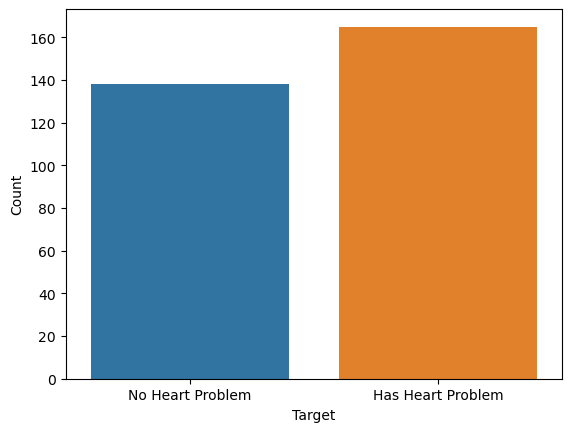

In [13]:
a=sns.countplot(x='target', data=dataset)
a.set_xticklabels(['No Heart Problem', 'Has Heart Problem'])
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()


In [14]:
target_temp = dataset.target.value_counts()
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### Feature Analysis

### Analysing the age 

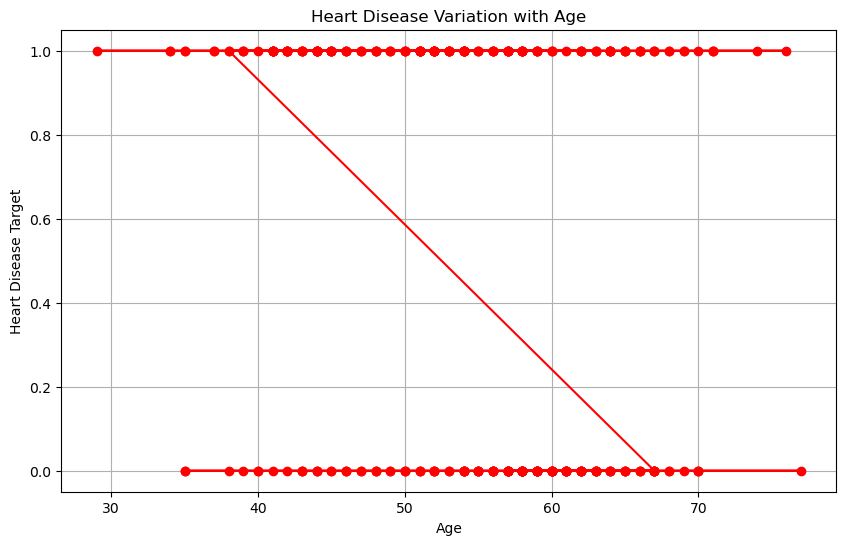

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(dataset['age'], dataset['target'], marker='o', linestyle='-', color='r')


plt.title('Heart Disease Variation with Age')
plt.xlabel('Age')
plt.ylabel('Heart Disease Target')
plt.grid(True)
plt.show()

### Analysing the 'Sex' feature

In [16]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

#### We notice, that as expected, the 'sex' feature has 2 unique features and not 72

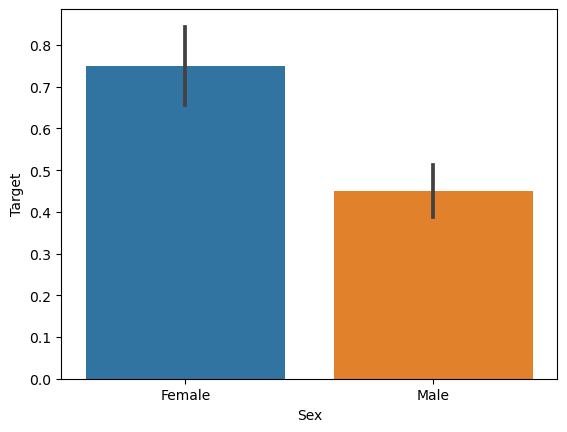

In [17]:
a=sns.barplot(x=dataset["sex"],y=dataset['target'],data=dataset)
a.set_xticklabels(['Female', 'Male'])
plt.ylabel('Target')
plt.xlabel('Sex')

plt.show()


##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [18]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

#### The CP feature has values from 0 to 3

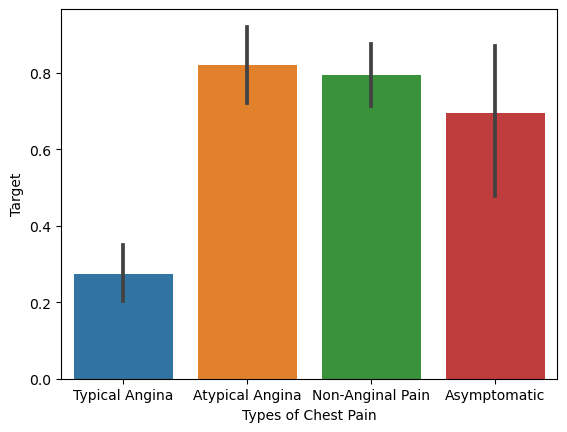

In [19]:
a=sns.barplot(x=dataset["cp"],y=dataset['target'],data=dataset)
a.set_xticklabels(['Typical Angina', 'Atypical Angina','Non-Anginal Pain','Asymptomatic'])
plt.ylabel('Target')
plt.xlabel('Types of Chest Pain')

plt.show()


#### We notice, that chest pain of  the ones with Atypical angina are much likely to have heart problems

### Analysing the FBS feature

In [20]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

#### The fbs feature has values 1,0

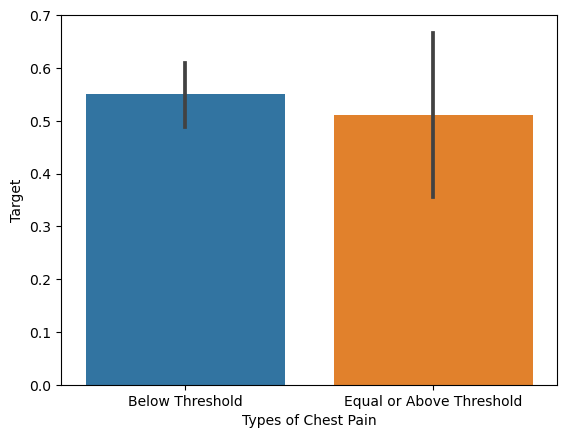

In [21]:
a=sns.barplot(x=dataset["fbs"],y=dataset['target'],data=dataset)
a.set_xticklabels(['Below Threshold', 'Equal or Above Threshold'])
plt.ylabel('Target')
plt.xlabel('Types of Chest Pain')

plt.show()

##### No noticable Difference

### Analysing the restecg feature

In [22]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

#### The restecg feature has values 0,1,2

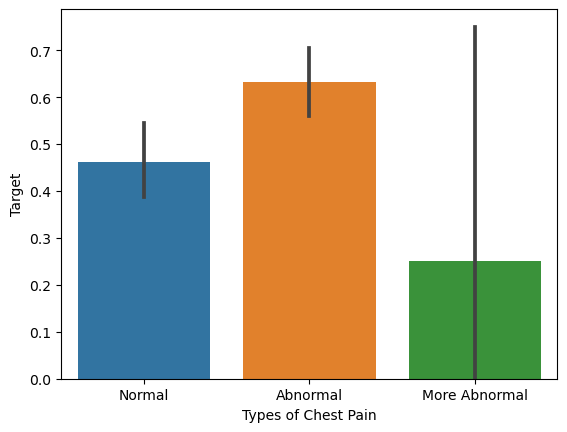

In [23]:
a=sns.barplot(x=dataset["restecg"],y=dataset['target'],data=dataset)
a.set_xticklabels(['Normal', 'Abnormal','More Abnormal'])
plt.ylabel('Target')
plt.xlabel('Types of Chest Pain')

plt.show()

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [24]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

#### The exang feature has values 1,0

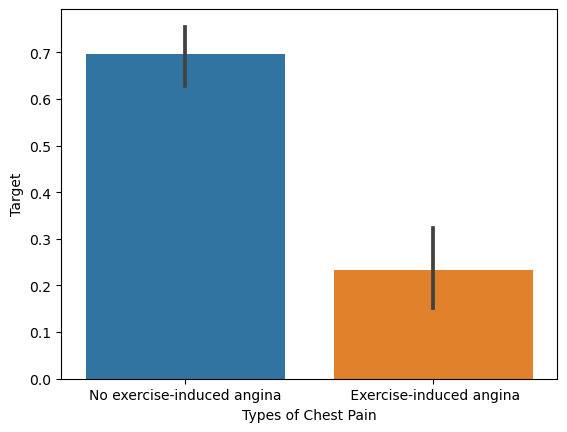

In [25]:
a=sns.barplot(x=dataset["exang"],y=dataset['target'],data=dataset)
a.set_xticklabels(['No exercise-induced angina', ' Exercise-induced angina'])
plt.ylabel('Target')
plt.xlabel('Types of Chest Pain')

plt.show()

##### People with  Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [26]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

#### The slope feature has values 1,0,2

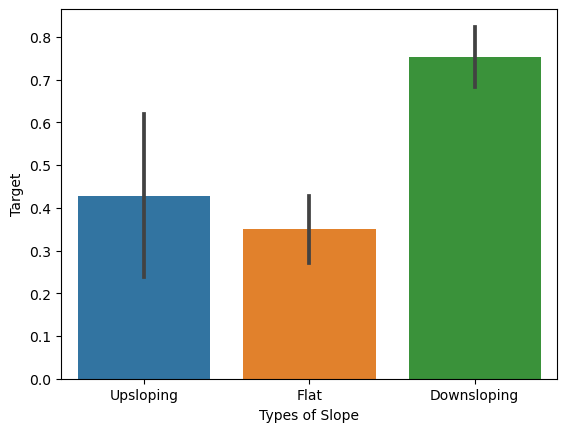

In [27]:
a=sns.barplot(x=dataset["slope"],y=dataset['target'],data=dataset)
a.set_xticklabels(['Upsloping', 'Flat','Downsloping'])
plt.ylabel('Target')
plt.xlabel('Types of Slope')

plt.show()

##### We observe, that Slope '2' causes heart problems much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [28]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

#### The ca feature has values from 0 to 4

<Axes: xlabel='ca', ylabel='count'>

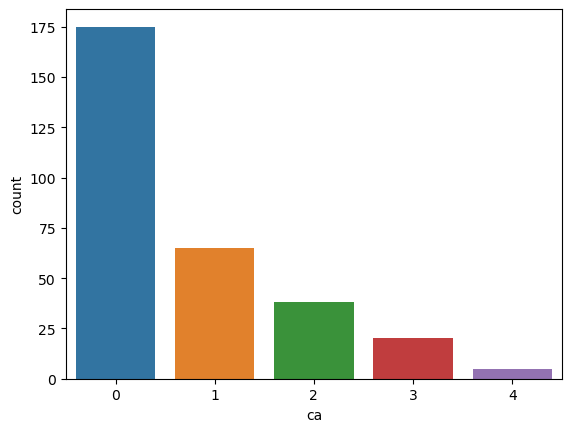

In [29]:
sns.countplot(x=dataset['ca'],data=dataset)

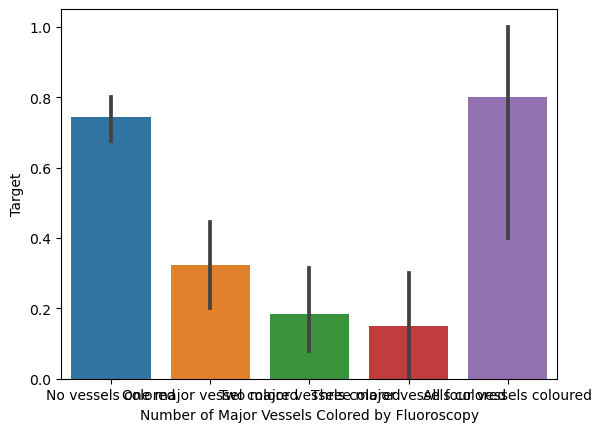

In [30]:
a=sns.barplot(x=dataset["ca"],y=dataset['target'],data=dataset)
a.set_xticklabels(['No vessels colored', 'One major vessel colored','Two major vessels colored','Three major vessels colored','All four vessels coloured'])
plt.ylabel('Target')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy')

plt.show()

##### ca=4 has  large number of heart patients

### Analysing the 'thal' feature

In [31]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

#### The fbs feature has values from 0 to 3

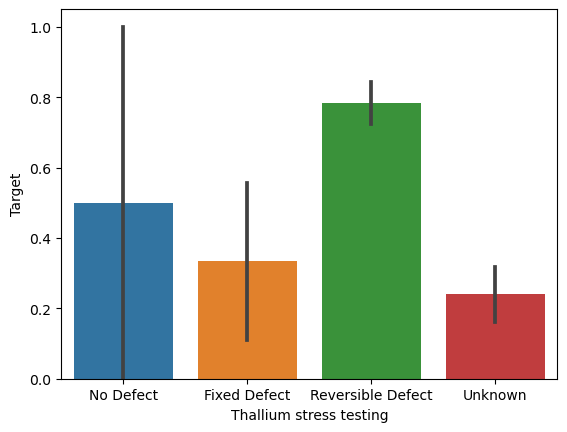

In [32]:
a=sns.barplot(x=dataset["thal"],y=dataset['target'],data=dataset)
a.set_xticklabels(['No Defect', 'Fixed Defect','Reversible Defect','Unknown'])
plt.ylabel('Target')
plt.xlabel('Thallium stress testing')

plt.show()

## Train Test split

In [33]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [34]:
X_train.shape

(242, 13)

In [35]:
X_test.shape

(61, 13)

In [36]:
Y_train.shape

(242,)

In [37]:
Y_test.shape

(61,)

## Model Training

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [39]:
Y_pred_lr.shape

(61,)

In [40]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [42]:
Y_pred_nb.shape

(61,)

In [43]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [44]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [45]:
Y_pred_svm.shape

(61,)

In [46]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [48]:
Y_pred_knn.shape

(61,)

In [49]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [51]:
print(Y_pred_dt.shape)

(61,)


In [52]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [54]:
Y_pred_rf.shape

(61,)

In [55]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


## Comparing the Algorithms and Finding The Most Acurate one

In [56]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

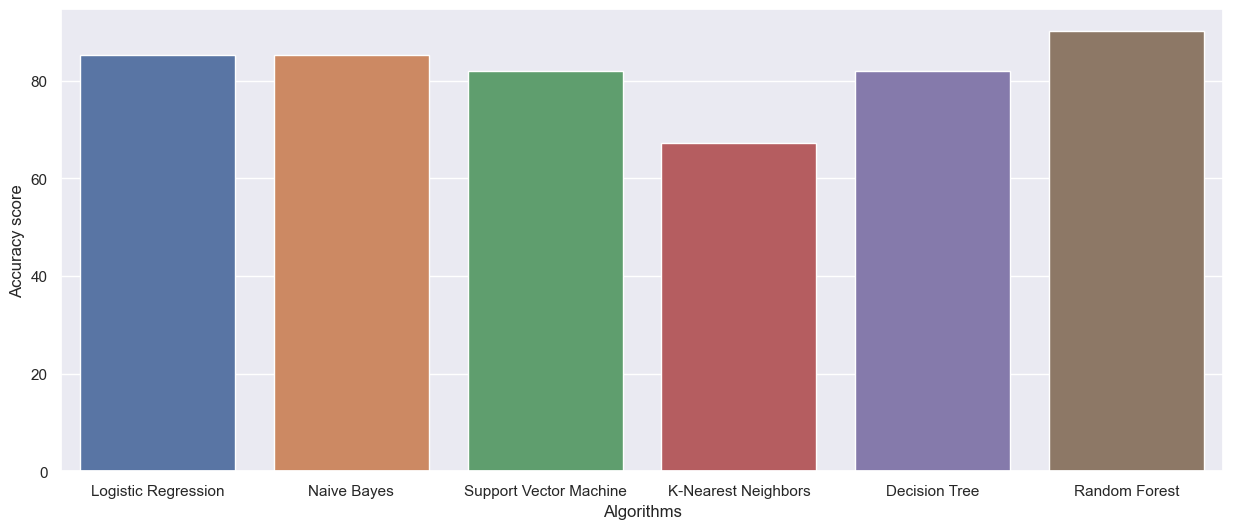

In [57]:
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

### The random forest has good result as compare to other algorithms <br> <br>
### So we that Algorithm to predict Heart Problem

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("heart.csv")

X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

user_input = []
for column in data.columns[:-1]:
    while True:
        try:
            value = float(input(f"Enter the value for {column}: "))
            user_input.append(value)
            break
        except ValueError:
            print("Please enter a valid numerical value.")

user_prediction = model.predict([user_input])

if user_prediction[0] == 1:
    print("The model predicts that the user has heart disease.")
    unsure = input("Are you still unsure? Enter 'yes' if you want to proceed to symptoms analysis: ")

    while unsure.lower() != "yes":
        unsure = input("Please enter 'yes' if you want to proceed to symptoms analysis: ")

    print("Let's proceed to symptoms analysis.")
    symptoms_input = []

    # Ask questions related to symptoms analysis
    symptoms_questions = [
        "Chest Pain or Discomfort",
        "Shortness of Breath",
        "Fatigue",
        "Palpitations",
        "Dizziness or Fainting",
        "Nausea",
        "Sweating",
        "Pain in Other Areas",
        "Heartburn or Indigestion",
        "Swelling in the Legs, Ankles, or Feet",
        "Persistent Coughing",
        "Appetite Changes",
        "Anxiety or Restlessness",
        "Difficulty Sleeping",
        "Lack of Stamina",
        "Sudden Weight Gain",
        "Rapid or Irregular Heartbeat",
        "Feeling of Fullness or Pressure in the Chest",
        "Pain that Radiates to the Back, Neck, Jaw, or Shoulder",
        "General Weakness",
        "Lightheadedness",
        "Persistent Indigestion",
        "Flu-like Symptoms, including Body Aches",
        "Feeling of Impending Doom",
        "Bluish Lips or Fingernails (Sign of severe cases)",
        "Confusion or Cognitive Changes",
        "Heavy Sweating",
        "Pain or Discomfort Between Shoulder Blades",
        "Unexplained Weakness or Fatigue",
        "Rapid Breathing",
        "Cold or Clammy Skin",
        "Changes in Skin Color (Pale or Gray)",
        "Reduced Ability to Exercise",
        "Persistent Nausea or Vomiting",
        "Pain or Discomfort in the Upper Abdomen",
        "Unexplained Anxiety",
        "Feeling of a 'Pounding' Heart",
        "Difficulty Swallowing",
        "Increased Heart Rate with Minimal Exertion",
        "Loss of Consciousness",
        "Swollen or Tender Abdomen",
        "Excessive Thirst",
        "Frequent Urination"
    ]

    for question in symptoms_questions:
        while True:
            response = input(f"Do you experience {question}? (Enter 'yes' or 'no'): ")
            if response.lower() in ['yes', 'no']:
                symptoms_input.append(response.lower() == "yes")
                break
            else:
                print("Please enter 'yes' or 'no'.")

    
    if sum(symptoms_input) >= len(symptoms_questions) / 2:
        print("Based on symptoms analysis, you may have heart disease. Please consult a healthcare professional.")
    else:
        print("Based on symptoms analysis, you may not have heart disease. However, consult a healthcare professional for confirmation.")
else:
    print("The model predicts that the user does not have heart disease.")

Enter the value for age: 58
Enter the value for sex: 0
Enter the value for cp: 3
Enter the value for trestbps: 150
Enter the value for chol: 283
Enter the value for fbs: 1
Enter the value for restecg: 0
Enter the value for thalach: 162
Enter the value for exang: 0
Enter the value for oldpeak: 1
Enter the value for slope: 2
Enter the value for ca: 0
Enter the value for thal: 2
The model predicts that the user has heart disease.
Are you still unsure? Enter 'yes' if you want to proceed to symptoms analysis: yes
Let's proceed to symptoms analysis.
Do you experience Chest Pain or Discomfort? (Enter 'yes' or 'no'): no
Do you experience Shortness of Breath? (Enter 'yes' or 'no'): no
Do you experience Fatigue? (Enter 'yes' or 'no'): no
Do you experience Palpitations? (Enter 'yes' or 'no'): no
Do you experience Dizziness or Fainting? (Enter 'yes' or 'no'): no
Do you experience Nausea? (Enter 'yes' or 'no'): tes
Please enter 'yes' or 'no'.
Do you experience Nausea? (Enter 'yes' or 'no'): yes
Do 

# WE go to Implementing our own Machine learning Algorithms Implementations